In [1]:
%matplotlib inline

import pystan
import matplotlib.pyplot as plt
import numpy as np

# Logisitic regression
### Data from Wikipedia - https://en.wikipedia.org/wiki/Logistic_regression
### Model from STAN docs

The problem as set is that students take an exam.  They either pass or fail.  We have access to the number of hours each student spent studying.  We want a logisitic regression to map the number of hours studied to the probability of passing the exam.  

The model is essentially the following: 

${\rm Probability \, of \, passing \, exam} = \frac{1}{1 + \exp(-(\alpha + \beta * {\rm hours}))}$

where $\alpha, \beta$ are just the coefficients of the linear model inside the logisitic function.

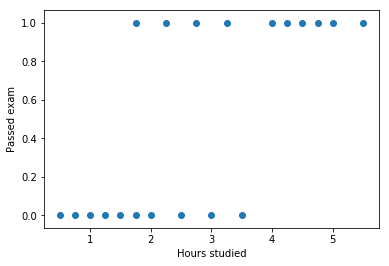

In [25]:
hours = [0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50]
passed = [0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1]

fig, ax = plt.subplots()
ax.scatter(hours, passed)
ax.set_xlabel('Hours studied')
ax.set_ylabel('Passed exam')
dat = {'N': len(hours),
      'x': hours,
      'y': passed}

### Setup the STAN model

In [5]:
lr_code = '''
data {
    int<lower=0> N;
    vector[N] x;
    int<lower=0, upper=1> y[N];
}
parameters {
    real alpha;
    real beta;
}
model {
    y ~ bernoulli_logit(alpha + beta * x);
}
''' 
sm = pystan.StanModel(model_code=lr_code, model_name='LogisiticReg')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL LogisiticReg_9e6a894a71f345f4deb5a5dc362deae0 NOW.


### Setup the sampling

/usr/local/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


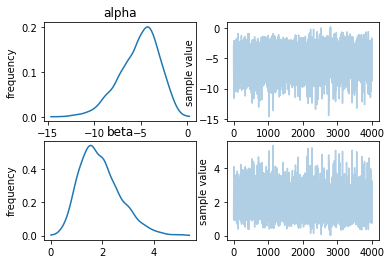

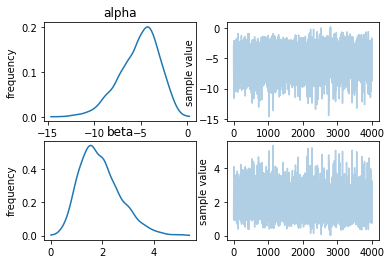

In [21]:
fit = sm.sampling(data=dat, iter=2000, chains=4)
fit.plot()

In [22]:
print(fit)

Inference for Stan model: LogisiticReg_9e6a894a71f345f4deb5a5dc362deae0.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha  -5.15    0.08   2.15  -9.88  -6.49  -4.85  -3.62  -1.64    661   1.01
beta    1.92    0.03   0.79   0.69   1.34    1.8   2.38   3.71    657   1.01
lp__   -9.17    0.04   1.11 -12.14  -9.65  -8.82  -8.36  -8.05    828    1.0

Samples were drawn using NUTS at Wed Feb 14 12:04:17 2018.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


Text(0,0.5,'Probability of passing exam')

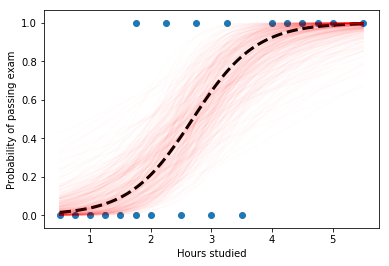

In [24]:
xx = np.linspace(0.5, 5.5, 100)
fig, ax = plt.subplots()
ax.scatter(hours, passed)
ax.plot(xx, (1.0 + np.exp(-(fit['alpha'].mean() + fit['beta'].mean() * xx)))**-1, 'k--', lw=3)
a = fit['alpha']
b = fit['beta']
for i in range(0,len(a),10):
    ax.plot(xx, (1.0 + np.exp(-(a[i] + b[i] * xx)))**-1, 'r-', alpha=0.01)
ax.set_xlabel('Hours studied')
ax.set_ylabel('Probability of passing exam')